# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Marketing Outcome Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [6]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
19,student,single,secondary,no,394,no,no,cellular,5,apr,327,3,-1,0,unknown,yes
19,student,single,secondary,no,372,no,no,telephone,8,jul,444,3,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes


In [7]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,1
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,1
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,2
19,student,single,secondary,no,394,no,no,cellular,5,apr,327,3,-1,0,unknown,yes,1
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes,1
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8930, 17)

In [12]:
# test data shape
bank_df_test.shape

(2232, 17)

In [13]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
19,student,single,unknown,no,108,no,no,cellular,10,aug,168,1,182,2,success,yes
19,student,single,secondary,no,329,no,no,cellular,30,apr,169,1,190,2,success,yes
19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes


In [14]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
20,student,married,unknown,no,292,no,no,cellular,5,aug,385,2,93,1,failure,yes
20,student,single,secondary,no,215,no,no,cellular,24,nov,325,1,95,5,success,yes
20,student,single,secondary,no,1819,no,no,cellular,9,apr,245,3,-1,0,unknown,yes
21,technician,single,unknown,no,360,no,no,cellular,26,may,131,2,-1,0,unknown,yes
21,student,single,unknown,no,200,no,no,unknown,1,jun,8,1,-1,0,unknown,no
21,student,single,tertiary,no,1258,no,no,cellular,7,jul,404,1,-1,0,unknown,no
21,student,single,secondary,no,71,no,no,cellular,13,jan,169,2,-1,0,unknown,yes
20,student,single,unknown,no,829,no,no,cellular,9,jul,253,2,-1,0,unknown,yes
19,student,single,unknown,no,779,no,no,cellular,1,apr,184,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluding svm and knn from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 300 sec
# Using max_models 10
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm', 'knn'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=500,
                     max_models=10, 
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
balance,BIGINT,8930,0,None,636,7747,547,0.0,100.0
default_value,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
loan,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
housing,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
age,BIGINT,8930,0,None,0,8930,0,0.0,100.0
month_of_year,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
poutcome,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
deposit,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
education,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0



Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
50%,39,541,15,256,2,-1,0
count,8930,8930,8930,8930,8930,8930,8930
mean,41.223,1512.535,15.679,373.66,2.513,51.517,0.828
min,18,-3058,1,3,1,-1,0
max,93,81204,31,3284,63,854,58
75%,49,1684.75,22,502,3,14.75,1
25%,32,116,8,138,1,-1,0
std,11.874,3194.4,8.413,347.749,2.744,109.512,2.28



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


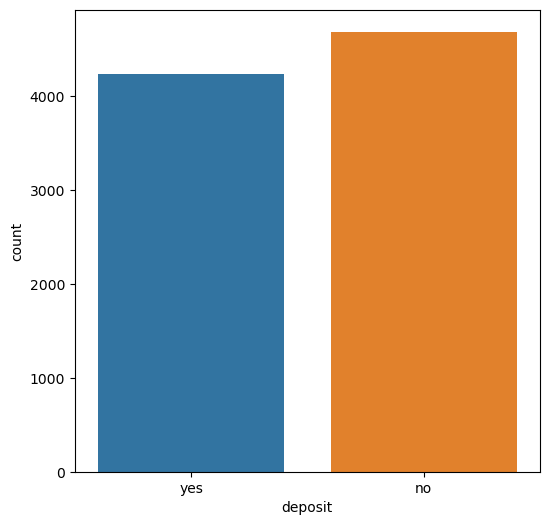

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   previous          11.243001
1        age           1.556551
2   duration           5.498320
3   campaign           5.352744
4      pdays          24.837626
5    balance           9.764838


Analysis completed. No action taken.                                                    


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987669935341"' - 1/17
Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171986196116187"'% - 5/17


['loan', 'job', 'education', 'contact', 'marital', 'month_of_year', 'default_value', 'housing', 'poutcome']


age,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
19,444,1,0,8,372,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,11,1,0,0,0,0,1,1
19,205,1,0,16,302,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,51,1,0,0,0,0,1,1
19,253,1,0,14,60,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,27,1,0,0,0,0,1,0
19,252,1,0,22,329,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99,1,0,0,0,0,1,1
19,327,1,0,5,394,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,75,1,0,0,0,0,1,1
19,236,1,0,12,608,180,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,91,1,0,0,0,1,0,1
19,273,1,0,9,108,182,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,35,1,0,0,0,1,0,1
19,168,1,0,10,108,182,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,83,1,0,0,0,1,0,1
19,169,1,0,30,329,190,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,67,1,0,0,0,1,0,1
19,271,1,0,27,134,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,1,0,0,0,0,1,1


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


age,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
80,712,1,0,9,8304,64,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,12,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,12,1,0,1,0,0,0,1
19,444,1,0,8,372,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,11,1,0,0,0,0,1,1
19,271,1,0,27,134,-1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,19,1,0,0,0,0,1,1
61,226,1,0,11,5267,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,14,1,0,0,0,0,1,1
49,979,1,0,25,566,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,13,0,1,0,0,0,1,1
49,559,1,0,12,408,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,21,1,0,0,0,0,1,1
40,232,1,0,24,3840,409,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,10,0,1,0,0,1,0,1
40,383,1,0,28,473,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,18,0,1,0,0,0,1,1
78,97,1,0,22,229,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,15,1,0,0,0,0,1,1
78,156,1,0,4,38,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,23,1,0,0,1,0,0,0


age,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
19,253,1,0,14,60,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,27,1,0,0,0,0,1,0
80,151,1,0,28,997,91,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,28,1,0,0,0,1,0,1
38,362,1,0,2,630,388,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,124,1,0,0,1,0,0,1
76,475,1,0,9,802,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,24,1,0,0,0,0,1,1
61,288,1,0,7,56,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,30,1,0,0,0,0,1,1
61,136,1,0,16,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,126,1,0,0,0,0,1,1
78,351,1,0,20,3208,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,31,1,0,0,0,0,1,1
78,135,1,0,17,1204,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,127,1,0,0,0,0,1,1
40,920,1,0,15,-9,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,26,0,1,0,0,0,1,1
40,274,1,0,14,277,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,122,0,1,0,0,0,1,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        age           1.556551
1    balance           9.764838
2      pdays          24.837626
3         id           0.761478
4   campaign           5.352744
5   previous          11.243001
6   duration           5.498320


['duration', 'campaign', 'age', 'id']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990824015198"'% - 7/17


age,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
32,697,1,0,15,772,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1575,0,1,0,0,0,1,1
32,360,1,0,23,207,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,975,0,1,0,0,0,1,0
32,357,1,0,21,-1053,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1887,0,1,0,0,0,1,0
32,949,1,0,4,3271,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,647,1,0,0,0,0,1,1
32,607,1,0,14,684,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,727,0,1,0,0,0,1,1
32,357,1,0,18,7290,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,767,0,1,0,0,0,1,1
32,463,1,0,23,1212,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1359,0,1,0,0,0,1,0
32,937,1,0,24,4612,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,255,0,1,0,0,0,1,0
32,192,1,0,4,1246,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,279,0,1,0,0,0,1,1
32,152,1,0,3,2360,160,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2271,1,0,0,1,0,0,1


['pdays', 'balance', 'previous']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987142124613"'% - 7/17


age,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
40,62,1,0,4,1498,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1162,1,0,0,0,0,1,0
40,177,1,0,3,1508,85,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1218,1,0,1,0,0,0,0
40,105,0,1,26,0,172,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1706,0,1,1,0,0,0,0
40,98,1,0,20,527,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,802,0,1,0,0,0,1,0
40,185,1,0,5,24,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,386,0,1,0,0,0,1,0
40,171,1,0,21,1066,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,658,0,1,0,0,0,1,0
40,306,1,0,13,260,181,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,786,0,1,0,0,1,0,1
40,277,1,0,10,2158,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1722,1,0,0,0,0,1,0
40,642,1,0,17,679,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1194,0,1,1,0,0,0,0
40,473,1,0,12,1694,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1730,1,0,0,0,0,1,1


['marital_1', 'education_0', 'month_of_year_0', 'job_8', 'month_of_year_2', 'job_4', 'contact_0', 'job_5', 'job_10', 'job_11', 'contact_1', 'day_of_month', 'balance', 'loan_1', 'pdays', 'marital_2', 'month_of_year_4', 'month_of_year_5', 'loan_0', 'month_of_year_11', 'previous', 'month_of_year_8', 'job_7', 'housing_0', 'month_of_year_1', 'job_6', 'job_3', 'month_of_year_7', 'job_9', 'default_value_0', 'housing_1', 'duration', 'marital_0', 'job_2', 'education_2', 'poutcome_0', 'education_3', 'month_of_year_10', 'poutcome_1', 'month_of_year_3', 'default_value_1', 'month_of_year_6', 'poutcome_3', 'job_1', 'campaign', 'job_0', 'education_1', 'month_of_year_9', 'poutcome_2', 'contact_2']


['day_of_month', 'balance', 'pdays', 'previous', 'duration', 'campaign']


marital_1,month_of_year_0,education_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_5,month_of_year_4,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,day_of_month,balance,pdays,previous,duration,campaign
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,7566,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.7,0.40413816118805274,0.0,0.0,0.33043478260869563,0.8
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,7572,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.13333333333333333,0.3647588853662606,0.0,0.0,0.23381642512077294,0.0
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,7574,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0.5666666666666667,0.5302853328883698,0.0,0.0,0.13623188405797101,0.4
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,7575,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0.0,0.3470715835140998,0.0,0.0,0.18164251207729468,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7586,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.9,0.35040881027865844,0.0,0.0,0.5690821256038647,0.2
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7587,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0.6,0.4004672117470382,0.0,0.0,0.05990338164251208,0.0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.43333333333333335,0.366260637410312,0.0,0.0,0.7574879227053141,0.2
0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,10,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.7666666666666667,0.982646420824295,0.0,1.0,0.22028985507246376,0.2
0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.23333333333333334,0.40397129984982477,0.0,0.0,0.4251207729468599,0.4
0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,13,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.8,0.4363423994660437,0.0,0.0,0.9420289855072463,0.2


marital_1,month_of_year_0,education_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_5,month_of_year_4,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,day_of_month,balance,pdays,previous,duration,campaign
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,26,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.4666666666666667,0.3403971299849825,0.0,0.0,0.885024154589372,0.2
1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.9,0.5082596362422827,0.4380952380952381,1.5,0.14202898550724638,0.0
0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,29,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.46787919239112297,0.0,0.0,1.1671497584541062,0.6
1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.2,0.3512431169697981,0.0,0.0,0.2743961352657005,0.4
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,120,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0.8666666666666667,0.507425329551143,0.0,0.0,0.13043478260869565,0.2
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,121,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.6333333333333333,1.6103787752377774,0.0,0.0,0.2106280193236715,0.0
1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,31,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.6333333333333333,0.8771900550642416,0.0,0.0,0.3352657004830918,0.4
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,27,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.43333333333333335,0.35191056232270984,0.0,0.0,0.24057971014492754,0.0
0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.6666666666666666,0.3368930418821959,0.0,0.0,1.3101449275362318,0.4
0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,24,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.26666666666666666,0.4757216752878358,0.0,0.0,0.45507246376811594,0.8


['duration', 'loan_0', 'loan_1', 'day_of_month', 'balance', 'pdays', 'job_0', 'job_1', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'education_0', 'education_1', 'education_2', 'education_3', 'previous', 'contact_0', 'contact_1', 'contact_2', 'campaign', 'marital_0', 'marital_1', 'marital_2', 'month_of_year_0', 'month_of_year_1', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'housing_0', 'housing_1', 'poutcome_0', 'poutcome_2', 'poutcome_3']


['r_duration', 'r_day_of_month', 'r_balance', 'r_pdays', 'r_previous', 'r_campaign']


r_loan_0,r_loan_1,r_education_2,r_job_10,deposit,r_month_of_year_1,r_month_of_year_3,r_month_of_year_11,r_job_5,r_education_0,r_housing_1,r_poutcome_2,r_contact_1,r_contact_2,r_month_of_year_8,id,r_job_1,r_housing_0,r_marital_2,r_job_7,r_poutcome_0,r_contact_0,r_month_of_year_9,r_month_of_year_0,r_month_of_year_6,r_education_1,r_job_4,r_month_of_year_5,r_job_0,r_job_6,r_month_of_year_4,r_month_of_year_10,r_poutcome_3,r_job_9,r_job_8,r_month_of_year_7,r_marital_1,r_education_3,r_marital_0,r_duration,r_day_of_month,r_balance,r_pdays,r_previous,r_campaign
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,11,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0.4251207729468599,0.23333333333333334,0.40397129984982477,0.0,0.0,0.4
1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.2144927536231884,0.3333333333333333,0.42983480727515433,0.0,0.0,0.4
1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,17,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.2492753623188406,0.2,0.34189888202903385,0.47619047619047616,1.0,0.0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,18,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0.36618357487922704,0.9,0.420824295010846,0.0,0.0,0.4
1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,21,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.5362318840579711,0.36666666666666664,0.40997830802603036,0.0,0.0,0.6
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,22,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.40869565217391307,0.9666666666666667,0.4965793425663274,0.0,0.0,0.4
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,10650,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.5120772946859904,0.23333333333333334,0.2638077757383614,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,10654,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0.18067632850241547,0.43333333333333335,0.6664441848823628,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10662,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.06666666666666667,0.5666666666666667,0.45736692808276325,0.0,0.0,0.6
0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,10666,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.7120772946859903,0.5,0.9571166360754213,0.0,0.0,0.6


r_loan_0,r_loan_1,r_education_2,r_job_10,deposit,r_month_of_year_1,r_month_of_year_3,r_month_of_year_11,r_job_5,r_education_0,r_housing_1,r_poutcome_2,r_contact_1,r_contact_2,r_month_of_year_8,id,r_job_1,r_housing_0,r_marital_2,r_job_7,r_poutcome_0,r_contact_0,r_month_of_year_9,r_month_of_year_0,r_month_of_year_6,r_education_1,r_job_4,r_month_of_year_5,r_job_0,r_job_6,r_month_of_year_4,r_month_of_year_10,r_poutcome_3,r_job_9,r_job_8,r_month_of_year_7,r_marital_1,r_education_3,r_marital_0,r_duration,r_day_of_month,r_balance,r_pdays,r_previous,r_campaign
1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.885024154589372,0.4666666666666667,0.3403971299849825,0.0,0.0,0.2
1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,28,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.14202898550724638,0.9,0.5082596362422827,0.4380952380952381,1.5,0.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,29,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.1671497584541062,1.0,0.46787919239112297,0.0,0.0,0.6
1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,30,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.2743961352657005,0.2,0.3512431169697981,0.0,0.0,0.4
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,120,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0.13043478260869565,0.8666666666666667,0.507425329551143,0.0,0.0,0.2
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,121,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.2106280193236715,0.6333333333333333,1.6103787752377774,0.0,0.0,0.0
1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.3352657004830918,0.6333333333333333,0.8771900550642416,0.0,0.0,0.4
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,27,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.24057971014492754,0.43333333333333335,0.35191056232270984,0.0,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,25,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1.3101449275362318,0.6666666666666666,0.3368930418821959,0.0,0.0,0.4
1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,24,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.45507246376811594,0.26666666666666666,0.4757216752878358,0.0,0.0,0.8


['age', 'duration', 'day_of_month', 'balance', 'pdays', 'previous', 'campaign']


marital_1,education_0,month_of_year_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_4,month_of_year_5,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,age,duration,day_of_month,balance,pdays,previous,campaign
0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1684,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.35714285714285715,0.34492753623188405,0.36666666666666664,0.499916569330886,0.0,0.0,0.2
0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,83,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.017857142857142856,0.15845410628019324,0.3,0.3599199065576506,0.8714285714285714,1.0,0.0
0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.017857142857142856,0.19420289855072465,0.5,0.3922910061738695,0.0,0.0,0.0
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1264,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.14285714285714285,0.4028985507246377,0.8,0.43650926080427166,0.0,0.0,0.0
0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2439,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.25,0.3536231884057971,0.9666666666666667,0.34189888202903385,0.0,0.0,0.4
0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,767,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.25,0.34106280193236715,0.5666666666666667,0.42983480727515433,0.0,0.0,0.0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,837,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.5535714285714286,0.2560386473429952,0.4,0.35307859169030537,0.0,0.0,0.6
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,725,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.5535714285714286,0.3893719806763285,0.03333333333333333,0.3799432671450025,0.44285714285714284,0.5,0.0
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,142,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.7678571428571429,0.37681159420289856,0.4666666666666667,0.42983480727515433,0.9047619047619048,0.5,0.4
1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,174,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7678571428571429,0.4241545893719807,1.0,0.37710662439512765,0.8904761904761904,0.0,0.2


marital_1,education_0,month_of_year_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_4,month_of_year_5,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,age,duration,day_of_month,balance,pdays,previous,campaign
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,26,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.39285714285714285,0.885024154589372,0.4666666666666667,0.3403971299849825,0.0,0.0,0.2
1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.1071428571428572,0.14202898550724638,0.9,0.5082596362422827,0.4380952380952381,1.5,0.0
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,124,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.35714285714285715,0.3458937198067633,0.03333333333333333,0.4470215251126314,1.8523809523809525,1.5,0.0
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,27,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.017857142857142856,0.24057971014492754,0.43333333333333335,0.35191056232270984,0.0,0.0,0.0
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.2857142857142857,1.3101449275362318,0.6666666666666666,0.3368930418821959,0.0,0.0,0.4
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,121,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.2857142857142857,0.2106280193236715,0.6333333333333333,1.6103787752377774,0.0,0.0,0.0
0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,29,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.5535714285714286,1.1671497584541062,1.0,0.46787919239112297,0.0,0.0,0.6
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,125,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0.5535714285714286,0.12657004830917876,0.13333333333333333,0.34690472217587187,0.0,0.0,0.6
1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.7678571428571429,0.2743961352657005,0.2,0.3512431169697981,0.0,0.0,0.4
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,126,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.7678571428571429,0.12753623188405797,0.5,0.34189888202903385,0.0,0.0,0.2


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30']


response_column : deposit                                                                                                                             
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
---------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987036965240"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987675817385"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988618547771"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988568414414"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987769655598"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171988726396659"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987976039552"'                                                                                                                       
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171993131666569"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171987683560357"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_0,lasso,0.816349,0.816349,0.816349,0.816349,0.822308,0.819664,0.816217,0.825158,0.816349,0.815973
1,2,DECISIONFOREST_0,lasso,0.806831,0.806831,0.806831,0.806831,0.806402,0.806223,0.806306,0.806787,0.806831,0.806803
2,3,DECISIONFOREST_3,rfe,0.805711,0.805711,0.805711,0.805711,0.806374,0.806981,0.805673,0.807909,0.805711,0.805807
3,4,DECISIONFOREST_1,lasso,0.794513,0.794513,0.794513,0.794513,0.794087,0.793764,0.793905,0.794440,0.794513,0.794456
4,5,DECISIONFOREST_2,rfe,0.778275,0.778275,0.778275,0.778275,0.787162,0.773422,0.774058,0.785207,0.778275,0.775579
5,6,GLM_2,pca,0.683651,0.683651,0.683651,0.683651,0.700426,0.675276,0.670019,0.698112,0.683651,0.673324
6,7,XGBOOST_1,rfe,0.674132,0.674132,0.674132,0.674132,0.742138,0.686448,0.658165,0.749097,0.674132,0.654525
7,8,GLM_0,lasso,0.589026,0.589026,0.589026,0.589026,0.588105,0.583435,0.580542,0.588298,0.589026,0.583481
8,9,XGBOOST_2,pca,0.475364,0.475364,0.475364,0.475364,0.237682,0.500000,0.322201,0.225971,0.475364,0.306326


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_0,lasso,0.816349,0.816349,0.816349,0.816349,0.822308,0.819664,0.816217,0.825158,0.816349,0.815973
1,2,DECISIONFOREST_0,lasso,0.806831,0.806831,0.806831,0.806831,0.806402,0.806223,0.806306,0.806787,0.806831,0.806803
2,3,DECISIONFOREST_3,rfe,0.805711,0.805711,0.805711,0.805711,0.806374,0.806981,0.805673,0.807909,0.805711,0.805807
3,4,DECISIONFOREST_1,lasso,0.794513,0.794513,0.794513,0.794513,0.794087,0.793764,0.793905,0.794440,0.794513,0.794456
4,5,DECISIONFOREST_2,rfe,0.778275,0.778275,0.778275,0.778275,0.787162,0.773422,0.774058,0.785207,0.778275,0.775579
5,6,GLM_2,pca,0.683651,0.683651,0.683651,0.683651,0.700426,0.675276,0.670019,0.698112,0.683651,0.673324
6,7,XGBOOST_1,rfe,0.674132,0.674132,0.674132,0.674132,0.742138,0.686448,0.658165,0.749097,0.674132,0.654525
7,8,GLM_0,lasso,0.589026,0.589026,0.589026,0.589026,0.588105,0.583435,0.580542,0.588298,0.589026,0.583481
8,9,XGBOOST_2,pca,0.475364,0.475364,0.475364,0.475364,0.237682,0.500000,0.322201,0.225971,0.475364,0.306326


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_0,lasso,0.816349,0.816349,0.816349,0.816349,0.822308,0.819664,0.816217,0.825158,0.816349,0.815973


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990526369839"'⫾⫾⫾⫾｜ 20% - 2/10


age,duration,day_of_month,loan,balance,pdays,job,education,previous,contact,campaign,marital,month_of_year,default_value,id,housing,poutcome,deposit
34,121,2,no,528,100,services,secondary,5,cellular,3,single,sep,no,25,yes,other,1
19,184,1,no,779,-1,student,unknown,0,cellular,4,single,apr,no,11,no,unknown,1
59,104,19,no,2769,131,management,primary,2,cellular,1,married,nov,no,379,yes,failure,0
61,503,10,no,1257,-1,retired,tertiary,0,cellular,1,married,feb,no,102,no,unknown,1
80,739,4,no,2354,181,retired,secondary,2,telephone,1,married,feb,no,12,no,failure,1
80,330,13,no,1468,-1,retired,primary,0,cellular,3,married,jan,no,28,no,unknown,1
95,207,21,no,2282,-1,retired,primary,0,telephone,17,divorced,apr,no,13,no,unknown,1
49,780,8,no,823,-1,services,secondary,0,cellular,4,married,aug,no,205,no,unknown,1
40,13,21,no,19343,179,services,secondary,4,cellular,4,single,nov,no,26,yes,failure,0
40,288,6,no,-66,-1,blue-collar,primary,0,unknown,1,married,may,no,98,yes,unknown,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__171990596154995"'⫾⫾⫾⫾｜ 50% - 5/10


age,duration,day_of_month,loan_0,loan_1,balance,pdays,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,id,housing_0,housing_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3,deposit
34,261,3,1,0,0,470,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,425,0,1,1,0,0,0,1
34,301,3,1,0,123,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,185,1,0,0,0,0,1,1
34,130,15,0,1,160,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,337,0,1,0,0,0,1,0
34,449,8,1,0,267,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,433,1,0,0,0,0,1,1
34,77,6,1,0,1254,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,49,1,0,0,0,0,1,0
34,93,18,0,1,1173,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,609,1,0,0,0,0,1,0
34,265,8,1,0,1352,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,473,1,0,0,0,0,1,0
34,88,3,1,0,3402,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,545,1,0,0,0,0,1,0
34,73,27,1,0,122,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,265,1,0,0,0,0,1,0
34,758,8,1,0,3696,160,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5,1,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,65,1,0,0,1,0,0,1


id,marital_1,education_0,month_of_year_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,job_11,contact_1,day_of_month,balance,loan_1,pdays,marital_2,month_of_year_4,month_of_year_5,loan_0,month_of_year_11,previous,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,month_of_year_7,job_9,default_value_0,housing_1,duration,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,campaign,job_0,education_1,month_of_year_9,poutcome_2,contact_2,deposit
179,1,0,0,0,0,0,0,1,0,0,0,12,434,0,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,63,0,0,0,0,0,0,0,0,0,0,1,0,3,0,1,0,0,1,0
371,1,0,0,0,0,0,0,0,0,0,1,13,0,0,-1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,494,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
275,1,0,0,0,0,0,0,1,0,0,1,27,9676,0,-1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,234,0,0,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1
163,1,0,0,0,0,0,0,0,0,1,0,20,2443,0,-1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,8,0,0,0,0,1,0,0,0,0,1,1,0,8,0,0,0,0,1,0
307,1,0,0,0,0,0,1,0,1,0,0,4,1625,0,180,0,0,0,1,0,2,0,0,1,1,0,0,0,0,1,0,198,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
155,1,0,0,0,0,0,1,0,0,0,0,30,2605,0,-1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,85,0,0,0,0,0,0,0,0,0,0,1,1,2,0,1,0,0,0,0
315,1,1,0,0,0,0,1,1,0,0,0,18,574,0,-1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,197,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0
123,1,1,0,0,0,1,0,0,0,0,0,2,396,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,72,0,0,0,0,0,0,0,0,0,1,1,0,3,0,0,0,0,1,0
91,0,0,0,0,0,1,1,0,0,0,0,26,81,0,-1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,140,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
11,0,0,1,1,0,0,1,0,0,0,0,1,779,0,-1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,184,0,0,0,0,1,0,0,0,0,0,1,0,4,0,0,0,0,0,1


marital_1,month_of_year_0,education_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_5,month_of_year_4,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,day_of_month,balance,pdays,previous,duration,campaign
1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,54,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.6333333333333333,0.3824461872184215,0.0,0.0,0.18357487922705315,0.0
1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,65,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.23333333333333334,0.9586183881194728,0.7666666666666667,2.5,0.7285024154589372,0.2
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,265,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.8666666666666667,0.36225596529284165,0.0,0.0,0.06666666666666667,0.8
0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.6666666666666666,0.722676455865176,0.0,0.0,0.1961352657004831,3.2
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0.6,0.3423994660437177,0.0,0.0,0.9603864734299516,0.0
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,370,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.13333333333333333,0.3497413649257467,1.7428571428571429,0.5,0.1497584541062802,0.0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,32,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.7333333333333333,0.6389120640747539,0.0,0.0,0.39516908212560387,0.4
1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,8,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.7,0.8409811446687803,0.8761904761904762,0.5,0.3285024154589372,0.0
1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,12,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0.1,0.7346904722175872,0.8666666666666667,1.0,0.7101449275362319,0.0
1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,20,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.36666666666666664,0.3677623894543634,0.44761904761904764,1.0,0.2763285024154589,0.0


id,duration,loan_0,loan_1,day_of_month,balance,pdays,job_0,job_1,job_4,job_5,job_6,job_7,job_8,job_9,job_10,education_0,education_1,education_2,education_3,previous,contact_0,contact_1,contact_2,campaign,marital_0,marital_1,marital_2,month_of_year_0,month_of_year_1,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,housing_0,housing_1,poutcome_0,poutcome_2,poutcome_3,deposit
394,598,0,1,8,523,-1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
346,118,1,0,7,29,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
386,8,1,0,20,1530,315,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
202,122,1,0,11,316,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
474,633,1,0,30,1597,-1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
298,725,1,0,29,795,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
338,76,0,1,26,1327,-1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
10,260,1,0,26,1289,-1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
370,159,1,0,5,47,365,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
330,998,1,0,19,3,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1


r_loan_0,r_loan_1,r_education_2,r_job_10,deposit,r_month_of_year_1,r_month_of_year_3,r_month_of_year_11,r_job_5,r_education_0,r_housing_1,r_poutcome_2,r_contact_1,r_contact_2,r_month_of_year_8,id,r_job_1,r_housing_0,r_marital_2,r_job_7,r_poutcome_0,r_contact_0,r_month_of_year_9,r_month_of_year_0,r_month_of_year_6,r_education_1,r_job_4,r_month_of_year_5,r_job_0,r_job_6,r_month_of_year_10,r_month_of_year_4,r_poutcome_3,r_job_9,r_job_8,r_month_of_year_7,r_marital_1,r_education_3,r_marital_0,r_duration,r_day_of_month,r_balance,r_pdays,r_previous,r_campaign
1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,13,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.1961352657004831,0.6666666666666666,0.722676455865176,0.0,0.0,3.2
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.17391304347826086,0.0,0.4718838645085934,0.0,0.0,0.6
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,91,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0.13140096618357489,0.8333333333333334,0.3554146504254964,0.0,0.0,0.0
0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,399,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.05507246376811594,0.7333333333333333,0.3922910061738695,1.8333333333333333,1.0,0.0
1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,12,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.7101449275362319,0.1,0.7346904722175872,0.8666666666666667,1.0,0.0
1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.2763285024154589,0.36666666666666664,0.3677623894543634,0.44761904761904764,1.0,0.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,65,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.7285024154589372,0.23333333333333334,0.9586183881194728,0.7666666666666667,2.5,0.2
1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,265,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.06666666666666667,0.8666666666666667,0.36225596529284165,0.0,0.0,0.8
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,330,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.9603864734299516,0.6,0.3423994660437177,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,370,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.1497584541062802,0.13333333333333333,0.3497413649257467,1.7428571428571429,0.5,0.0


marital_1,education_0,month_of_year_0,job_8,month_of_year_2,job_4,contact_0,job_5,job_10,deposit,job_11,contact_1,loan_1,marital_2,month_of_year_4,month_of_year_5,loan_0,month_of_year_11,month_of_year_8,job_7,housing_0,month_of_year_1,job_6,job_3,id,month_of_year_7,job_9,default_value_0,housing_1,marital_0,job_2,education_2,poutcome_0,education_3,month_of_year_10,poutcome_1,month_of_year_3,default_value_1,month_of_year_6,poutcome_3,job_1,job_0,education_1,month_of_year_9,poutcome_2,contact_2,age,duration,day_of_month,balance,pdays,previous,campaign
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0.39285714285714285,0.9603864734299516,0.6,0.3423994660437177,0.0,0.0,0.0
0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,13,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.375,0.1961352657004831,0.6666666666666666,0.722676455865176,0.0,0.0,3.2
0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,61,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0.5535714285714286,0.2,0.13333333333333333,0.628566661104622,0.0,0.0,0.0
1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,399,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.25,0.05507246376811594,0.7333333333333333,0.3922910061738695,1.8333333333333333,1.0,0.0
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,32,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.0357142857142858,0.39516908212560387,0.7333333333333333,0.6389120640747539,0.0,0.0,0.4
1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,8,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0357142857142858,0.3285024154589372,0.7,0.8409811446687803,0.8761904761904762,0.5,0.0
0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.017857142857142856,0.17391304347826086,0.0,0.4718838645085934,0.0,0.0,0.6
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,91,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.7321428571428571,0.13140096618357489,0.8333333333333334,0.3554146504254964,0.0,0.0,0.0
1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,12,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1.1071428571428572,0.7101449275362319,0.1,0.7346904722175872,0.8666666666666667,1.0,0.0
1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,20,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.1071428571428572,0.2763285024154589,0.36666666666666664,0.3677623894543634,0.44761904761904764,1.0,0.0


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,deposit
0,32,0.495231,0.367583,-0.884906,0.335185,-0.069655,-0.265386,-0.176650,0.338084,-0.116951,...,0.560362,0.806393,0.057036,0.322011,-0.179740,-0.112710,-0.242430,0.169224,0.194404,1
1,65,-1.385426,0.260433,-0.246438,1.345227,0.878148,0.067128,0.380824,0.075145,-0.294912,...,0.313179,-0.517444,1.150125,-0.208046,0.063300,-1.287897,0.960007,0.273253,0.047968,1
2,330,-0.388150,-0.455849,0.759975,-0.767163,-0.132586,0.220890,-0.620706,-0.137883,-0.475626,...,-0.184363,-0.018501,0.345939,0.503352,-0.131870,-0.041008,-0.023711,0.060763,0.008097,1
3,11,-0.813958,0.091985,0.487782,-0.759439,-0.053134,0.209910,-0.629954,-0.187583,-0.162176,...,0.523088,1.143645,0.483864,-0.445230,0.074434,0.317298,0.294272,-0.153494,-0.243082,1
4,12,-0.364676,-1.095809,0.087897,0.668504,1.315416,0.080997,0.537255,0.323305,0.059510,...,-0.123337,-0.045831,0.176077,0.443690,-0.262164,-0.457575,0.049094,0.158296,-0.203771,1
5,13,-0.311494,-0.367137,-0.741585,-0.799675,0.280853,0.590038,-0.584818,0.950896,1.138951,...,-1.352698,1.228618,-0.032056,-0.320442,-0.646607,-0.088690,0.311279,0.064195,0.378725,1
6,54,-0.331284,-1.097395,-0.250275,-0.055821,-0.149451,-0.351838,-0.230005,0.164469,-0.220131,...,-0.023263,0.027823,-0.031082,-0.355635,-0.361816,-0.038617,-0.030002,-0.016305,-0.054445,1
7,399,0.219472,0.911430,-0.410049,1.404105,0.677472,0.897395,1.702263,-0.016099,-0.055214,...,-0.035319,-0.129633,0.405420,0.037734,-0.014149,-0.002078,0.079731,0.020117,-0.287158,1
8,8,-1.198226,-0.233022,-0.406013,0.927930,0.892084,0.095174,0.237764,0.107528,0.207249,...,0.006979,-0.034380,-0.436103,0.148798,-0.369457,0.215000,0.648964,0.050076,0.312162,1
9,265,-0.117736,0.843765,-0.103455,-1.321443,0.620481,-0.177636,0.464151,-0.836656,0.510821,...,-0.322253,0.152697,0.011912,-0.196866,-0.265918,-0.026274,0.052400,-0.057771,0.085951,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Prediction : 
    id  Prediction  Confidence_Lower  Confidence_upper  deposit
0   65           1              1.00              1.00        1
1   54           0              0.52              0.52        1
2   86           1              1.00              1.00        1
3  330           1              0.96              0.96        1
4   13           0              0.52              0.52        1
5   61           0              0.56              0.56        1
6   12           1              1.00              1.00        1
7   20           1              0.96              0.96        1
8   11           1              0.64              0.64        1
9   91           0              0.80              0.80        0

Performance Metrics : 
       P

AUC,GINI
0.7007685208693515,0.40153704173870297


threshold_value,tpr,fpr
0.04081632653061224,0.8872970391595033,0.25738396624472576
0.08163265306122448,0.8872970391595033,0.25738396624472576
0.1020408163265306,0.8872970391595033,0.25738396624472576
0.12244897959183673,0.8872970391595033,0.25738396624472576
0.16326530612244897,0.8872970391595033,0.25738396624472576
0.18367346938775508,0.8872970391595033,0.25738396624472576
0.14285714285714285,0.8872970391595033,0.25738396624472576
0.061224489795918366,0.8872970391595033,0.25738396624472576
0.02040816326530612,0.8872970391595033,0.25738396624472576
0.0,1.0,1.0



Confusion Matrix : 


array([[880, 305],
       [118, 929]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,deposit
10,0,0.56,0.56,0
12,1,1.0,1.0,1
13,0,0.52,0.52,1
14,1,0.96,0.96,1
16,1,0.88,0.88,1
17,1,1.0,1.0,1
15,0,0.76,0.76,0
11,1,0.64,0.64,1
9,1,0.92,0.92,1
8,1,1.0,1.0,1


In [23]:
remove_context()

True